In [1]:
#Dependencies

In [1]:
import pandas as pd
from pathlib import Path
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy.stats as st
import seaborn as sns
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read in the CSV Files

In [3]:
df = pd.read_csv('data_files/Population of all US Cities 2024.csv')

In [4]:
csv_path = Path("data_files/urban_connectivity.csv")

In [9]:
crime_rates = Path("data_filescrime_250_plus.csv")
cities_population = Path("data_filesPopulation of all US Cities 2024.csv")

In [11]:
urban_connectivity = pd.read_csv('data_files/urban_connectivity.csv')
population = pd.read_csv("data_files/population.csv")

In [13]:
cities_crime_rates_df = pd.read_csv('data_files/crime_250_plus.csv')
population_city_df = pd.read_csv('data_files/Population of all US Cities 2024.csv')

In [15]:
rank_total_cost_df = pd.read_csv("data_files/rank_totalcost.csv")

In [17]:
#Crime Rate EDA

In [19]:
# Combine both CSV files into dataset
crime_rates_plus_population_df = pd.merge(cities_crime_rates_df, population_city_df, left_on= "cities", right_on= "US City", how= "right")
crime_rates_plus_population_df.head()

,states,cities,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,...,tot_prop_crim,arson,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,New York,New York,"8,804,190",1987.49,3.39,27.56,162.42,345.52,538.90,128.87,...,"1,448.59",NaN,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,California,Los Angeles,"3,898,747",3332.52,7.01,61.27,269.87,423.17,761.31,415.96,...,"2,535.92",35.29,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,Illinois,Chicago,"2,746,388",4381.65,18.26,65.11,439.26,570.36,"1,098.86",477.13,...,"3,263.80",18.99,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
3,Texas,Houston,"2,304,580",5252.08,11.50,58.42,417.96,607.34,"1,095.23",731.66,...,"4,128.41",28.44,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
4,Arizona,Phoenix,"1,608,139",4443.20,9.55,69.46,200.28,481.64,760.93,778.57,...,"3,670.71",11.56,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33


In [21]:
# filter cities to the 10 chosen for the project
cities_filtered_df = crime_rates_plus_population_df[crime_rates_plus_population_df['cities'].isin(['Atlanta', 'Austin', 'Chicago', 'Denver', 'Los Angeles', 'New York', 
    'San Diego', 'Tampa', 'Boston', 'Nashville'])]
cities_filtered_df

# Now set an index for your cities
filtered_cities_crime = cities_filtered_df.set_index("cities")
filtered_cities_crime

,states,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,...,tot_prop_crim,arson,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
cities,,,,,,,,,,,,,,,,,,,,,
New York,New York,"8,804,190",1987.49,3.39,27.56,162.42,345.52,538.90,128.87,"1,253.15",...,"1,448.59",NaN,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
Los Angeles,California,"3,898,747",3332.52,7.01,61.27,269.87,423.17,761.31,415.96,"1,640.99",...,"2,535.92",35.29,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
Chicago,Illinois,"2,746,388",4381.65,18.26,65.11,439.26,570.36,"1,098.86",477.13,"2,358.83",...,"3,263.80",18.99,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
San Diego,California,"1,386,932",2220.67,2.46,39.25,99.01,225.89,366.61,268.03,"1,214.37",...,"1,842.97",11.09,8,San Diego,California,1388996,1386292,0.0005,4260,326.09
Austin,Texas,"971,949",3612.23,2.57,85.81,101.55,224.91,414.84,450.64,"2,525.03",...,"3,189.57",7.82,12,Austin,Texas,984567,965827,0.0048,3017,326.37
Denver,Colorado,"706,616",4360.93,8.35,98.92,174.35,393.99,675.61,612.92,"2,267.29",...,"3,667.06",18.26,19,Denver,Colorado,716234,717606,-0.0005,4679,153.07
Boston,Massachusetts,"682,903",2758.22,8.35,42.47,205.59,412.80,669.20,308.83,"1,603.74",...,"2,089.02",NaN,25,Boston,Massachusetts,646622,675466,-0.0110,13377,48.34
Atlanta,Georgia,"481,343",5727.52,16.41,58.59,293.55,567.16,935.72,704.28,"3,387.19",...,"4,776.43",15.37,36,Atlanta,Georgia,514465,499896,0.0071,3804,135.25
Tampa,Florida,"384,360",2218.24,10.15,31.48,105.63,317.15,464.41,321.31,"1,274.85",...,"1,743.68",10.15,49,Tampa,Florida,408510,387924,0.0128,3595,113.64


In [14]:
# New Data Frame with only certain columns (states, cities, total_crime)
cities_crime_rates_clean = filtered_cities_crime[["states", "Population 2024", "total_crime"]]
cities_crime_rates_clean

,states,Population 2024,total_crime
cities,,,
New York,New York,8097282,1987.49
Los Angeles,California,3795936,3332.52
Chicago,Illinois,2638159,4381.65
San Diego,California,1388996,2220.67
Austin,Texas,984567,3612.23
Denver,Colorado,716234,4360.93
Boston,Massachusetts,646622,2758.22
Atlanta,Georgia,514465,5727.52
Tampa,Florida,408510,2218.24


In [15]:
total_crime_df= cities_crime_rates_clean["total_crime"]
total_crime_df

cities
New York       1987.49
Los Angeles    3332.52
Chicago        4381.65
San Diego      2220.67
Austin         3612.23
Denver         4360.93
Boston         2758.22
Atlanta        5727.52
Tampa          2218.24
Name: total_crime, dtype: float64

In [146]:
cities_crime_rates_clean['total crime score'] = cities_crime_rates_clean['total_crime'].rank(ascending=False, method='min')
cities_crime_rates_clean

,states,Population 2024,total_crime,total crime score
cities,,,,
New York,New York,8097282,1987.49,9.0
Los Angeles,California,3795936,3332.52,5.0
Chicago,Illinois,2638159,4381.65,2.0
San Diego,California,1388996,2220.67,7.0
Austin,Texas,984567,3612.23,4.0
Denver,Colorado,716234,4360.93,3.0
Boston,Massachusetts,646622,2758.22,6.0
Atlanta,Georgia,514465,5727.52,1.0
Tampa,Florida,408510,2218.24,8.0


In [17]:
#Crime Charts

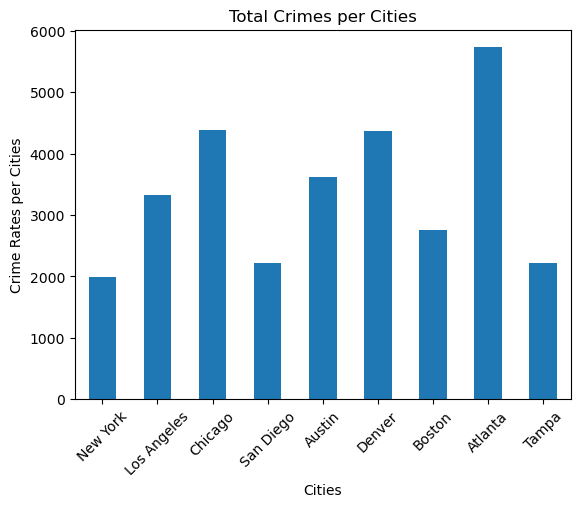

In [18]:
# Create a bar graph for the assigned cities crime
cities_crime_rates_graph= total_crime_df.plot(kind="bar")
cities_crime_rates_graph.set_xlabel("Cities")
cities_crime_rates_graph.set_ylabel("Crime Rates per Cities")
cities_crime_rates_graph.set_title("Total Crimes per Cities")
plt.xticks(rotation = 45)
plt.show()

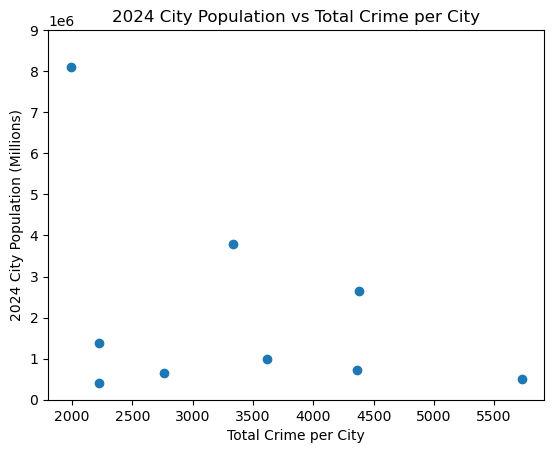

In [19]:
# label x and y values
x_values = cities_crime_rates_clean['Population 2024']
y_values = cities_crime_rates_clean['total_crime']

# Create a scatter plot for Total Crimes per Cities
plt.xlabel("Total Crime per City")
plt.ylabel("2024 City Population (Millions)")
plt.title("2024 City Population vs Total Crime per City")
plt.ylim(0,9000000)
plt.scatter(y_values,x_values)

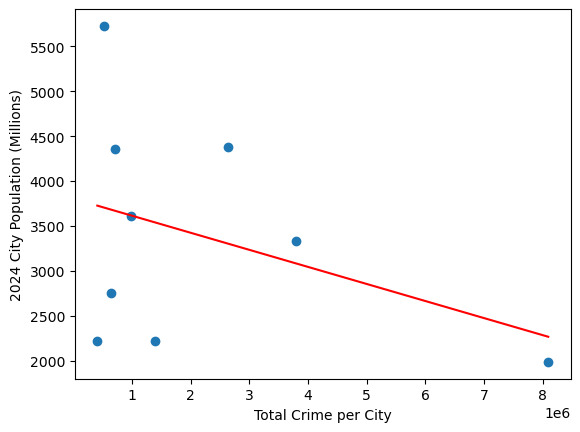

In [20]:
# Create a line regression graph
x_values = cities_crime_rates_clean['Population 2024']
y_values = cities_crime_rates_clean['total_crime']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Total Crime per City')
plt.ylabel('2024 City Population (Millions)')
plt.show()

In [21]:
#Urban Connectivity EDA

In [22]:
#Print the CSV File

In [23]:
urban_connectivity

,Unnamed: 0,Place_name,City,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
0,0,"Los Angeles, CA",Los Angeles,CA,68.6,52.9,58.7,3792621,3903648.0,296527.0,...,17.0,64.0,4.0,33.00,33.00,1.0,0.0,133.0,0.00,0.0
1,1,"San Diego, CA",San Diego,CA,53.3,37.3,43.0,1307402,1394592.0,206371.0,...,4.0,14.0,3.0,66.20,292.80,0.0,50.0,8.0,0.00,0.0
2,2,"San Jose, CA",San Jose,CA,50.5,40.1,61.5,945942,1018924.0,112666.0,...,2.0,6.0,1.0,75.60,37.90,0.0,0.0,42.0,0.00,0.0
3,3,"San Francisco, CA",San Francisco,CA,88.7,77.1,72.3,805235,883822.0,29892.0,...,11.0,12.0,2.0,51.35,34.00,3.0,0.0,5.0,7.00,4.0
4,4,"Fresno, CA",Fresno,CA,46.6,33.1,58.1,494665,547499.0,72537.0,...,7.0,9.0,1.0,2.00,0.00,10.0,0.0,17.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,"Wichita, KS",Wichita,KS,34.8,19.7,43.9,382368,399769.0,101231.0,...,11.0,6.0,7.0,88.53,12.26,8.0,0.0,15.0,0.00,0.0
98,98,"Anchorage, AK",Anchorage,AK,30.9,21.6,51.8,291826,290509.0,1087624.0,...,0.0,5.0,2.0,135.00,0.00,0.0,0.0,2.0,0.00,0.0
99,99,"Boise, ID",Boise City,ID,38.5,22.6,62.3,205671,240861.0,52046.0,...,6.0,7.0,2.0,34.10,49.00,0.0,0.0,4.0,0.13,0.0
100,100,"Albuquerque, NM",Albuquerque,NM,42.6,28.6,60.9,545852,567242.0,113711.0,...,4.0,12.0,3.0,160.00,0.00,0.0,0.0,20.0,0.00,0.0


In [24]:
#Set The index to the city name

In [25]:
urban_connectivity = urban_connectivity.set_index("City")

In [26]:
#Print the first five rows of the data frame

In [27]:
urban_connectivity.head()

,Unnamed: 0,Place_name,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,City_Population_Stats_density__people_acre_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
City,,,,,,,,,,,,,,,,,,,,,
Los Angeles,0,"Los Angeles, CA",CA,68.6,52.9,58.7,3792621,3903648.0,296527.0,13.164562,...,17.0,64.0,4.0,33.00,33.0,1.0,0.0,133.0,0.0,0.0
San Diego,1,"San Diego, CA",CA,53.3,37.3,43.0,1307402,1394592.0,206371.0,6.757694,...,4.0,14.0,3.0,66.20,292.8,0.0,50.0,8.0,0.0,0.0
San Jose,2,"San Jose, CA",CA,50.5,40.1,61.5,945942,1018924.0,112666.0,9.043758,...,2.0,6.0,1.0,75.60,37.9,0.0,0.0,42.0,0.0,0.0
San Francisco,3,"San Francisco, CA",CA,88.7,77.1,72.3,805235,883822.0,29892.0,29.567175,...,11.0,12.0,2.0,51.35,34.0,3.0,0.0,5.0,7.0,4.0
Fresno,4,"Fresno, CA",CA,46.6,33.1,58.1,494665,547499.0,72537.0,7.547858,...,7.0,9.0,1.0,2.00,0.0,10.0,0.0,17.0,0.0,0.0


In [28]:
#Create a data frame using the 10 selected cities for the project

In [29]:
urban_connectivity_df = urban_connectivity.loc[["Chicago", "New York", "Los Angeles", "Nashville","Boston","Austin","Atlanta","San Diego","Denver","Tampa"]]

In [30]:
#Print the data frame

In [31]:
urban_connectivity_df

,Unnamed: 0,Place_name,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,City_Population_Stats_density__people_acre_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
City,,,,,,,,,,,,,,,,,,,,,
Chicago,17,"Chicago, IL",IL,77.2,65.0,72.2,2695598,2750534.0,136157.0,20.201194,...,242.0,79.0,2.0,80.2,104.70,1.0,31.0,27.0,0.0,0.0
New York,21,"New York, NY",NY,88.0,88.6,69.3,8175133,8840134.0,186181.0,47.481397,...,595.0,66.0,14.0,445.5,353.00,82.0,27.0,179.0,24.0,4.0
Los Angeles,0,"Los Angeles, CA",CA,68.6,52.9,58.7,3792621,3903648.0,296527.0,13.164562,...,17.0,64.0,4.0,33.0,33.00,1.0,0.0,133.0,0.0,0.0
Nashville,81,"Nashville/Davidson, TN",TN,28.8,21.7,29.7,601222,714169.0,299313.0,2.386027,...,4.0,10.0,5.0,131.5,100.00,35.0,0.0,8.0,0.0,0.0
Boston,47,"Boston, MA",MA,82.8,72.4,69.4,617594,685476.0,29222.0,23.457532,...,86.0,28.0,0.0,4.0,0.00,2.0,0.0,1.0,0.0,0.0
Austin,55,"Austin, TX",TX,41.7,34.8,54.0,790390,1003496.0,172115.0,5.830381,...,17.0,34.0,6.0,160.5,119.06,7.0,15.0,26.0,0.0,0.0
Atlanta,40,"Atlanta, GA",GA,47.7,43.7,41.7,420003,515426.0,85564.0,6.023865,...,10.0,33.0,1.0,114.0,0.00,5.0,2.0,30.0,0.5,0.5
San Diego,1,"San Diego, CA",CA,53.3,37.3,43.0,1307402,1394592.0,206371.0,6.757694,...,4.0,14.0,3.0,66.2,292.80,0.0,50.0,8.0,0.0,0.0
Denver,67,"Denver, CO",CO,61.2,44.6,71.8,600158,744729.0,74662.0,9.974673,...,20.0,32.0,2.0,328.0,0.00,0.0,0.0,13.0,5.5,0.0


In [32]:
#Create a new data frame with only the pertinant columns for the project (State, Walk Score, Transit Score, Bike Score)

In [33]:
new_urban_connectivity_df = urban_connectivity_df[["State", "Walk Score", "Transit Score", "Bike Score"]]
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score
City,,,,
Chicago,IL,77.2,65.0,72.2
New York,NY,88.0,88.6,69.3
Los Angeles,CA,68.6,52.9,58.7
Nashville,TN,28.8,21.7,29.7
Boston,MA,82.8,72.4,69.4
Austin,TX,41.7,34.8,54.0
Atlanta,GA,47.7,43.7,41.7
San Diego,CA,53.3,37.3,43.0
Denver,CO,61.2,44.6,71.8


In [34]:
#Create a new column called "Walk Score Rank" and rank each city by the given walk score

In [35]:
new_urban_connectivity_df['Walk Score Rank'] = new_urban_connectivity_df['Walk Score'].rank()
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank
City,,,,,
Chicago,IL,77.2,65.0,72.2,8.0
New York,NY,88.0,88.6,69.3,10.0
Los Angeles,CA,68.6,52.9,58.7,7.0
Nashville,TN,28.8,21.7,29.7,1.0
Boston,MA,82.8,72.4,69.4,9.0
Austin,TX,41.7,34.8,54.0,2.0
Atlanta,GA,47.7,43.7,41.7,3.0
San Diego,CA,53.3,37.3,43.0,5.0
Denver,CO,61.2,44.6,71.8,6.0


In [36]:
#Create a new column called "Transit Score Rank" and rank each city by the given transit score

In [37]:
new_urban_connectivity_df['Transit Score Rank'] = new_urban_connectivity_df['Transit Score'].rank()
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank,Transit Score Rank
City,,,,,,
Chicago,IL,77.2,65.0,72.2,8.0,8.0
New York,NY,88.0,88.6,69.3,10.0,10.0
Los Angeles,CA,68.6,52.9,58.7,7.0,7.0
Nashville,TN,28.8,21.7,29.7,1.0,1.0
Boston,MA,82.8,72.4,69.4,9.0,9.0
Austin,TX,41.7,34.8,54.0,2.0,3.0
Atlanta,GA,47.7,43.7,41.7,3.0,5.0
San Diego,CA,53.3,37.3,43.0,5.0,4.0
Denver,CO,61.2,44.6,71.8,6.0,6.0


In [38]:
#Create a new column called "Bike Score Rank" and rank each city by the given Bike score

In [39]:
new_urban_connectivity_df['Bike Score Rank'] = new_urban_connectivity_df['Bike Score'].rank()
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank,Transit Score Rank,Bike Score Rank
City,,,,,,,
Chicago,IL,77.2,65.0,72.2,8.0,8.0,10.0
New York,NY,88.0,88.6,69.3,10.0,10.0,7.0
Los Angeles,CA,68.6,52.9,58.7,7.0,7.0,6.0
Nashville,TN,28.8,21.7,29.7,1.0,1.0,1.0
Boston,MA,82.8,72.4,69.4,9.0,9.0,8.0
Austin,TX,41.7,34.8,54.0,2.0,3.0,4.0
Atlanta,GA,47.7,43.7,41.7,3.0,5.0,2.0
San Diego,CA,53.3,37.3,43.0,5.0,4.0,3.0
Denver,CO,61.2,44.6,71.8,6.0,6.0,9.0


In [40]:
#Create a new column called "Total Urban Score" which should be the sum of the values in columns "Walk Score Rank", "Transit Score Rank" and "Bike Score Rank".
#Print the new data frame.

In [41]:
new_urban_connectivity_df['Total Urban Score'] = new_urban_connectivity_df['Walk Score Rank'] + new_urban_connectivity_df['Transit Score Rank'] + new_urban_connectivity_df['Bike Score Rank']

In [42]:
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank,Transit Score Rank,Bike Score Rank,Total Urban Score
City,,,,,,,,
Chicago,IL,77.2,65.0,72.2,8.0,8.0,10.0,26.0
New York,NY,88.0,88.6,69.3,10.0,10.0,7.0,27.0
Los Angeles,CA,68.6,52.9,58.7,7.0,7.0,6.0,20.0
Nashville,TN,28.8,21.7,29.7,1.0,1.0,1.0,3.0
Boston,MA,82.8,72.4,69.4,9.0,9.0,8.0,26.0
Austin,TX,41.7,34.8,54.0,2.0,3.0,4.0,9.0
Atlanta,GA,47.7,43.7,41.7,3.0,5.0,2.0,10.0
San Diego,CA,53.3,37.3,43.0,5.0,4.0,3.0,12.0
Denver,CO,61.2,44.6,71.8,6.0,6.0,9.0,21.0


In [43]:
#Create a new column called "Total Urban Score Rank".  This column should rank the cities by the total urban score previously calculated.

In [44]:
new_urban_connectivity_df['Total Urban Score Rank'] = new_urban_connectivity_df['Total Urban Score'].rank()
new_urban_connectivity_df

,State,Walk Score,Transit Score,Bike Score,Walk Score Rank,Transit Score Rank,Bike Score Rank,Total Urban Score,Total Urban Score Rank
City,,,,,,,,,
Chicago,IL,77.2,65.0,72.2,8.0,8.0,10.0,26.0,8.5
New York,NY,88.0,88.6,69.3,10.0,10.0,7.0,27.0,10.0
Los Angeles,CA,68.6,52.9,58.7,7.0,7.0,6.0,20.0,6.0
Nashville,TN,28.8,21.7,29.7,1.0,1.0,1.0,3.0,1.0
Boston,MA,82.8,72.4,69.4,9.0,9.0,8.0,26.0,8.5
Austin,TX,41.7,34.8,54.0,2.0,3.0,4.0,9.0,2.0
Atlanta,GA,47.7,43.7,41.7,3.0,5.0,2.0,10.0,3.0
San Diego,CA,53.3,37.3,43.0,5.0,4.0,3.0,12.0,5.0
Denver,CO,61.2,44.6,71.8,6.0,6.0,9.0,21.0,7.0


In [45]:
#Reorganize columns to have the rankings follow the scores

In [46]:
organized_urban_connectivity_df = new_urban_connectivity_df [["State","Bike Score","Bike Score Rank","Transit Score", "Transit Score Rank", 
                                                              "Walk Score", "Walk Score Rank","Total Urban Score", "Total Urban Score Rank"]]
organized_urban_connectivity_df

,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
City,,,,,,,,,
Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0
Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0


In [47]:
#Sort the data frame alphabetically by city name

In [48]:
sorted_urban_connectivity = organized_urban_connectivity_df.sort_index(ascending=True)
sorted_urban_connectivity

,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
City,,,,,,,,,
Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0


In [49]:
#Create a data series for each city's bike score

In [50]:
bike_score_df = sorted_urban_connectivity ["Bike Score"]
bike_score_df

City
Atlanta        41.7
Austin         54.0
Boston         69.4
Chicago        72.2
Denver         71.8
Los Angeles    58.7
Nashville      29.7
New York       69.3
San Diego      43.0
Tampa          55.2
Name: Bike Score, dtype: float64

In [51]:
#EDA for Population

In [52]:
cities = ["Atlanta", "Austin", "Chicago", "Denver", "Los Angeles", "Nashville (balance)", 
          "New York", "San Diego", "Boston", "Tampa"]

# Filter the dataframe
filtered_df = df[df['US City'].isin(cities)]

# Display the filtered data
filtered_df

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
7,8,San Diego,California,1388996,1386292,0.0005,4260,326.09
11,12,Austin,Texas,984567,965827,0.0048,3017,326.37
18,19,Denver,Colorado,716234,717606,-0.0005,4679,153.07
20,21,Nashville (balance),Tennessee,687150,689700,-0.0009,1445,475.57
24,25,Boston,Massachusetts,646622,675466,-0.0110,13377,48.34
35,36,Atlanta,Georgia,514465,499896,0.0071,3804,135.25
48,49,Tampa,Florida,408510,387924,0.0128,3595,113.64


In [53]:
filtered_df_cleaned = filtered_df.iloc[:, :-2]
filtered_df_cleaned

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1,New York,New York,8097282,8740292,-0.0195
1,2,Los Angeles,California,3795936,3895848,-0.0065
2,3,Chicago,Illinois,2638159,2743329,-0.0099
7,8,San Diego,California,1388996,1386292,0.0005
11,12,Austin,Texas,984567,965827,0.0048
18,19,Denver,Colorado,716234,717606,-0.0005
20,21,Nashville (balance),Tennessee,687150,689700,-0.0009
24,25,Boston,Massachusetts,646622,675466,-0.0110
35,36,Atlanta,Georgia,514465,499896,0.0071
48,49,Tampa,Florida,408510,387924,0.0128


In [54]:
filtered_df_cleaned['Annual Change'] = filtered_df_cleaned['Annual Change'].apply(lambda x: f"{round(x * 100, 2)}%")
# Display the updated dataframe
filtered_df_cleaned

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1,New York,New York,8097282,8740292,-1.95%
1,2,Los Angeles,California,3795936,3895848,-0.65%
2,3,Chicago,Illinois,2638159,2743329,-0.99%
7,8,San Diego,California,1388996,1386292,0.05%
11,12,Austin,Texas,984567,965827,0.48%
18,19,Denver,Colorado,716234,717606,-0.05%
20,21,Nashville (balance),Tennessee,687150,689700,-0.09%
24,25,Boston,Massachusetts,646622,675466,-1.1%
35,36,Atlanta,Georgia,514465,499896,0.71%
48,49,Tampa,Florida,408510,387924,1.28%


In [55]:
filtered_df_cleaned['Rank'] = filtered_df_cleaned['Population 2024'].rank(ascending=False)

# Sort the dataframe by rank
ranked_cities_df = filtered_df_cleaned.sort_values(by='Rank')

# Display the ranked cities
ranked_cities_df

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1.0,New York,New York,8097282,8740292,-1.95%
1,2.0,Los Angeles,California,3795936,3895848,-0.65%
2,3.0,Chicago,Illinois,2638159,2743329,-0.99%
7,4.0,San Diego,California,1388996,1386292,0.05%
11,5.0,Austin,Texas,984567,965827,0.48%
18,6.0,Denver,Colorado,716234,717606,-0.05%
20,7.0,Nashville (balance),Tennessee,687150,689700,-0.09%
24,8.0,Boston,Massachusetts,646622,675466,-1.1%
35,9.0,Atlanta,Georgia,514465,499896,0.71%
48,10.0,Tampa,Florida,408510,387924,1.28%


In [56]:
#Population Bar Graph

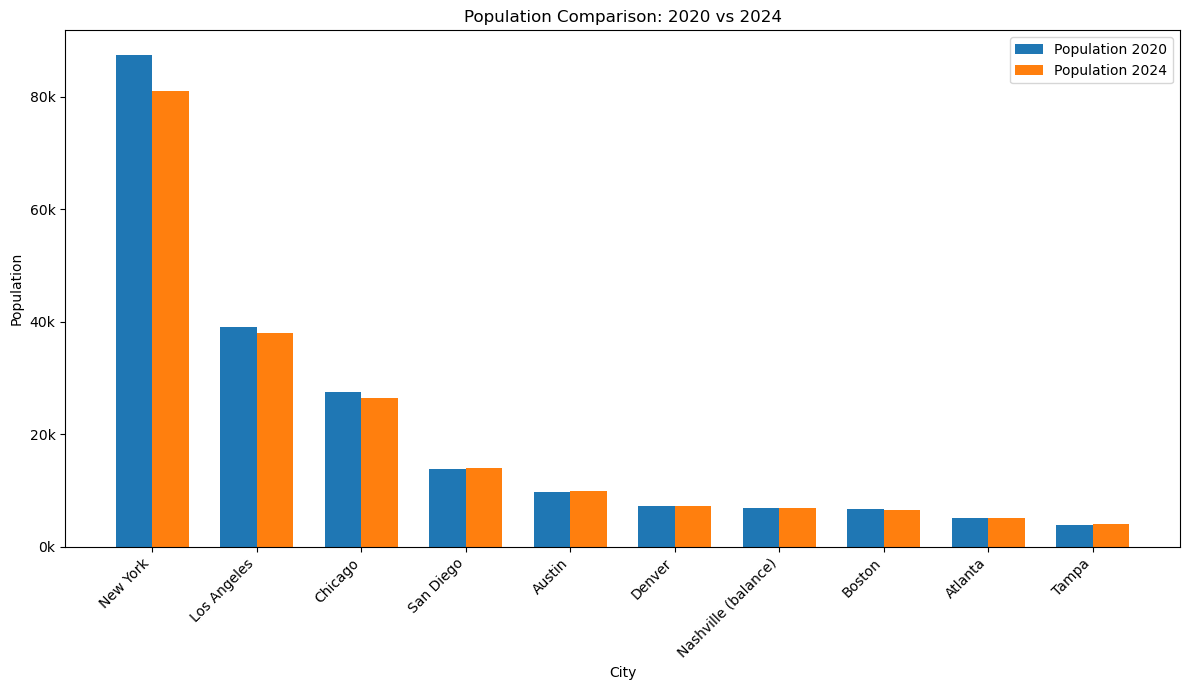

In [57]:
cities = filtered_df_cleaned['US City']

def thousands(x, pos):
    return f'{int(x / 100000)}k'

bar_width = 0.35
index = np.arange(len(cities))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the bars for Population 2020 and Population 2024
bars1 = ax.bar(index, filtered_df_cleaned['Population 2020'], bar_width, label='Population 2020')
bars2 = ax.bar(index + bar_width, filtered_df_cleaned['Population 2024'], bar_width, label='Population 2024')

# Add labels, title, and ticks
ax.set_xlabel('City')
ax.set_ylabel('Population')
ax.set_title('Population Comparison: 2020 vs 2024')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cities, rotation=45, ha='right')

# Format the y-axis to show values in thousands
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
#Urban Connectivity Charts

In [59]:
#Create a bar graph for each city's Bike Score

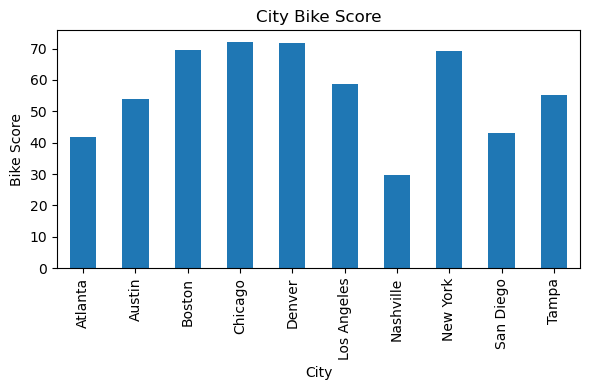

In [60]:
bike_score_chart = bike_score_df.plot(kind="bar", figsize=(6,4))
bike_score_chart.set_xlabel("City")
bike_score_chart.set_ylabel("Bike Score")
bike_score_chart.set_title("City Bike Score")
plt.tight_layout()
plt.show()

In [61]:
#Create a data series for each city's transit score

In [62]:
transit_score_df = sorted_urban_connectivity ["Transit Score"]
transit_score_df

City
Atlanta        43.7
Austin         34.8
Boston         72.4
Chicago        65.0
Denver         44.6
Los Angeles    52.9
Nashville      21.7
New York       88.6
San Diego      37.3
Tampa          31.3
Name: Transit Score, dtype: float64

In [63]:
#Create a bar graph for each city's Tranist Score

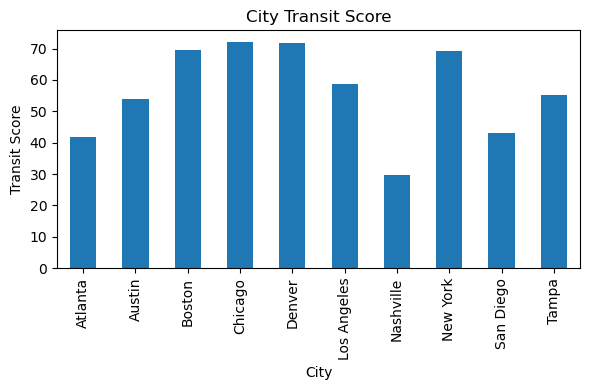

In [64]:
transit_score_chart = bike_score_df.plot(kind="bar", figsize=(6,4))
transit_score_chart.set_xlabel("City")
transit_score_chart.set_ylabel("Transit Score")
transit_score_chart.set_title("City Transit Score")
plt.tight_layout()
plt.show()

In [65]:
#create a data series for each cities' walk score

In [66]:
walk_score_df = sorted_urban_connectivity ["Walk Score"]
walk_score_df

City
Atlanta        47.7
Austin         41.7
Boston         82.8
Chicago        77.2
Denver         61.2
Los Angeles    68.6
Nashville      28.8
New York       88.0
San Diego      53.3
Tampa          49.5
Name: Walk Score, dtype: float64

In [67]:
#Create a bar graph for each city's Walk Score

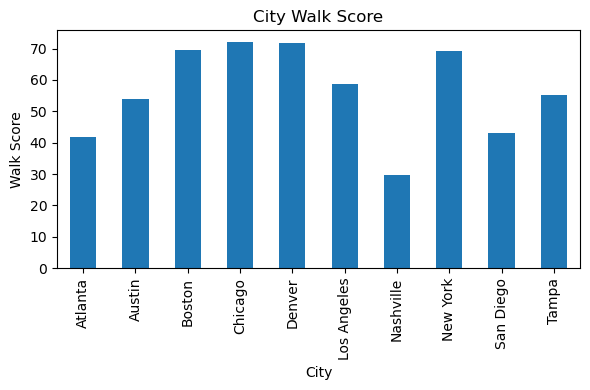

In [68]:
walk_score_chart = bike_score_df.plot(kind="bar", figsize=(6,4))
walk_score_chart.set_xlabel("City")
walk_score_chart.set_ylabel("Walk Score")
walk_score_chart.set_title("City Walk Score")
plt.tight_layout()
plt.show()

In [69]:
#Create a series to depect each city's Total Urban Score

In [70]:
total_urban_score_df = sorted_urban_connectivity ["Total Urban Score"]
total_urban_score_df

City
Atlanta        10.0
Austin          9.0
Boston         26.0
Chicago        26.0
Denver         21.0
Los Angeles    20.0
Nashville       3.0
New York       27.0
San Diego      12.0
Tampa          11.0
Name: Total Urban Score, dtype: float64

In [71]:
#Creat a bar graph for each city's Total Urban Score

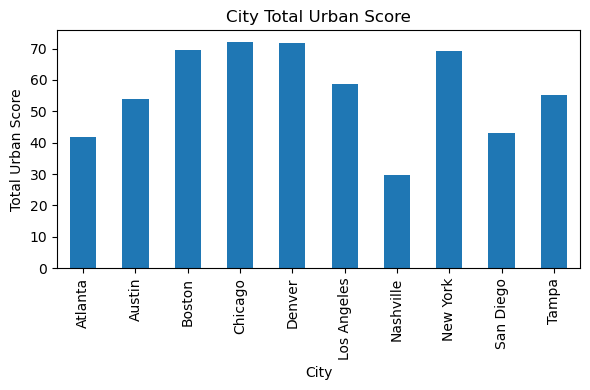

In [72]:
total_urban_score_chart = bike_score_df.plot(kind="bar", figsize=(6,4))
total_urban_score_chart.set_xlabel("City")
total_urban_score_chart.set_ylabel("Total Urban Score")
total_urban_score_chart.set_title("City Total Urban Score")
plt.tight_layout()
plt.show()

In [73]:
#Print a head of the population dataframe from team members imported csv file

In [74]:
population.head(10)

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1,New York,New York,8097282,8740292,-1.95%
1,2,Los Angeles,California,3795936,3895848,-0.65%
2,3,Chicago,Illinois,2638159,2743329,-0.99%
3,8,San Diego,California,1388996,1386292,0.05%
4,12,Austin,Texas,984567,965827,0.48%
5,19,Denver,Colorado,716234,717606,-0.05%
6,25,Boston,Massachusetts,646622,675466,-1.1%
7,36,Atlanta,Georgia,514465,499896,0.71%
8,49,Tampa,Florida,408510,387924,1.28%


In [75]:
#Reset index of population dataframe for merging

In [76]:
population = population.reset_index()
population

,index,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,0,1,New York,New York,8097282,8740292,-1.95%
1,1,2,Los Angeles,California,3795936,3895848,-0.65%
2,2,3,Chicago,Illinois,2638159,2743329,-0.99%
3,3,8,San Diego,California,1388996,1386292,0.05%
4,4,12,Austin,Texas,984567,965827,0.48%
5,5,19,Denver,Colorado,716234,717606,-0.05%
6,6,25,Boston,Massachusetts,646622,675466,-1.1%
7,7,36,Atlanta,Georgia,514465,499896,0.71%
8,8,49,Tampa,Florida,408510,387924,1.28%


In [77]:
sorted_urban_connectivity

,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
City,,,,,,,,,
Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0


In [78]:
#Reset Index of sorted urban connectivity dataframe for merging

In [79]:
sorted_urban_connectivity = sorted_urban_connectivity.reset_index()
sorted_urban_connectivity

,City,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
0,Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
1,Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
2,Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
3,Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
4,Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
5,Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
6,Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
7,New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
8,San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0
9,Tampa,FL,55.2,5.0,31.3,2.0,49.5,4.0,11.0,4.0


In [80]:
#Rename city column in sorted urban connectivity dataframe to merge

In [81]:
sorted_urban_connectivity.rename(columns={'City': 'US City'}, inplace=True)
sorted_urban_connectivity

,US City,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
0,Atlanta,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
1,Austin,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
2,Boston,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
3,Chicago,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
4,Denver,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
5,Los Angeles,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
6,Nashville,TN,29.7,1.0,21.7,1.0,28.8,1.0,3.0,1.0
7,New York,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
8,San Diego,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0
9,Tampa,FL,55.2,5.0,31.3,2.0,49.5,4.0,11.0,4.0


In [82]:
#Merge population and urban connectivity dataframe

In [83]:
merged_popurban_df = pd.merge(population, sorted_urban_connectivity, on='US City') 
merged_popurban_df

,index,Rank,US City,US State,Population 2024,Population 2020,Annual Change,State,Bike Score,Bike Score Rank,Transit Score,Transit Score Rank,Walk Score,Walk Score Rank,Total Urban Score,Total Urban Score Rank
0,0,1,New York,New York,8097282,8740292,-1.95%,NY,69.3,7.0,88.6,10.0,88.0,10.0,27.0,10.0
1,1,2,Los Angeles,California,3795936,3895848,-0.65%,CA,58.7,6.0,52.9,7.0,68.6,7.0,20.0,6.0
2,2,3,Chicago,Illinois,2638159,2743329,-0.99%,IL,72.2,10.0,65.0,8.0,77.2,8.0,26.0,8.5
3,3,8,San Diego,California,1388996,1386292,0.05%,CA,43.0,3.0,37.3,4.0,53.3,5.0,12.0,5.0
4,4,12,Austin,Texas,984567,965827,0.48%,TX,54.0,4.0,34.8,3.0,41.7,2.0,9.0,2.0
5,5,19,Denver,Colorado,716234,717606,-0.05%,CO,71.8,9.0,44.6,6.0,61.2,6.0,21.0,7.0
6,6,25,Boston,Massachusetts,646622,675466,-1.1%,MA,69.4,8.0,72.4,9.0,82.8,9.0,26.0,8.5
7,7,36,Atlanta,Georgia,514465,499896,0.71%,GA,41.7,2.0,43.7,5.0,47.7,3.0,10.0,3.0
8,8,49,Tampa,Florida,408510,387924,1.28%,FL,55.2,5.0,31.3,2.0,49.5,4.0,11.0,4.0


In [84]:
#Condense merged dataframe

In [85]:
cleaned_popurban_df = merged_popurban_df[["US State","US City","Population 2024", "Walk Score", "Transit Score", "Bike Score","Total Urban Score Rank"]]
cleaned_popurban_df

,US State,US City,Population 2024,Walk Score,Transit Score,Bike Score,Total Urban Score Rank
0,New York,New York,8097282,88.0,88.6,69.3,10.0
1,California,Los Angeles,3795936,68.6,52.9,58.7,6.0
2,Illinois,Chicago,2638159,77.2,65.0,72.2,8.5
3,California,San Diego,1388996,53.3,37.3,43.0,5.0
4,Texas,Austin,984567,41.7,34.8,54.0,2.0
5,Colorado,Denver,716234,61.2,44.6,71.8,7.0
6,Massachusetts,Boston,646622,82.8,72.4,69.4,8.5
7,Georgia,Atlanta,514465,47.7,43.7,41.7,3.0
8,Florida,Tampa,408510,49.5,31.3,55.2,4.0


In [86]:
#Reset indexes to city name for new cleaned and condensed dataframe

In [87]:
cleaned_popurban_df = cleaned_popurban_df.set_index("US City")

In [88]:
cleaned_popurban_df

,US State,Population 2024,Walk Score,Transit Score,Bike Score,Total Urban Score Rank
US City,,,,,,
New York,New York,8097282,88.0,88.6,69.3,10.0
Los Angeles,California,3795936,68.6,52.9,58.7,6.0
Chicago,Illinois,2638159,77.2,65.0,72.2,8.5
San Diego,California,1388996,53.3,37.3,43.0,5.0
Austin,Texas,984567,41.7,34.8,54.0,2.0
Denver,Colorado,716234,61.2,44.6,71.8,7.0
Boston,Massachusetts,646622,82.8,72.4,69.4,8.5
Atlanta,Georgia,514465,47.7,43.7,41.7,3.0
Tampa,Florida,408510,49.5,31.3,55.2,4.0


In [89]:
#Calculate summary statistics for urban connectivity
#Create a small data frame of pertinant summary statistics
urban_connectivity_summary_stats_df = new_urban_connectivity_df.describe()
urban_connectivity_summary_df = new_urban_connectivity_df[['Walk Score', 'Transit Score', 'Bike Score']].agg(['mean', 'min', 'max'])
print(urban_connectivity_summary_stats_df)
urban_connectivity_summary_df

       Walk Score  Transit Score  Bike Score  Walk Score Rank  \
count   10.000000      10.000000   10.000000         10.00000   
mean    59.880000      49.230000   56.500000          5.50000   
std     19.118624      20.631586   14.693687          3.02765   
min     28.800000      21.700000   29.700000          1.00000   
25%     48.150000      35.425000   45.750000          3.25000   
50%     57.250000      44.150000   56.950000          5.50000   
75%     75.050000      61.975000   69.375000          7.75000   
max     88.000000      88.600000   72.200000         10.00000   

       Transit Score Rank  Bike Score Rank  Total Urban Score  \
count            10.00000         10.00000          10.000000   
mean              5.50000          5.50000          16.500000   
std               3.02765          3.02765           8.527733   
min               1.00000          1.00000           3.000000   
25%               3.25000          3.25000          10.250000   
50%               5.5000

,Walk Score,Transit Score,Bike Score
mean,59.88,49.23,56.5
min,28.80,21.70,29.7
max,88.00,88.60,72.2


In [116]:
#Create a scatter plot with a regression line for walk score v population
xw = cleaned_popurban_df['Walk Score']  
yw = cleaned_popurban_df['Population 2024']  

In [117]:
pop = cleaned_popurban_df.iloc[:,1]
walk = cleaned_popurban_df.iloc[:,2]
walkpop_correlation = st.pearsonr(walk,pop)
print(f"The correlation between population and walk score is {round(walkpop_correlation[0],2)}")

The correlation between population and walk score is 0.65


In [118]:
(slope,intercept, r_value, p_value, std_err) = linregress(xw,yw)
print(f"Slope(m): {round(slope,2)}")
print(f"Intercept(b): {round(intercept,2)}")
print(f"correlation(r): {round(r_value,2)}")

Slope(m): 98555.04
Intercept(b): -4109511.07
correlation(r): 0.65


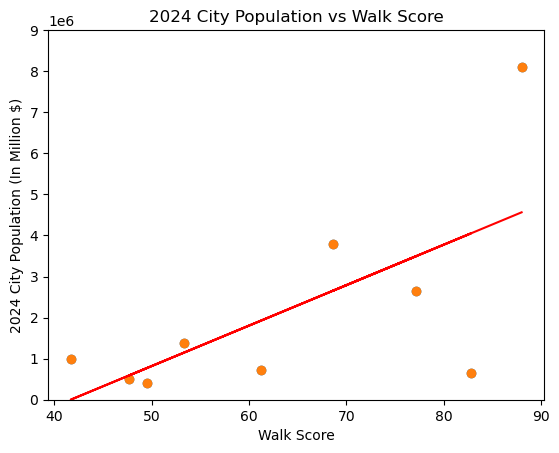

In [142]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(xw, yw)
walkpop_regress_values = xw * slope + intercept
walkpop_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xw,yw)
plt.plot(xw,walkpop_regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Walk Score")
plt.ylabel("2024 City Population (In Million $)")
plt.title("2024 City Population vs Walk Score")
plt.ylim(0,9000000)
plt.scatter(xw, yw)

In [125]:
#Create a scatter plot with a regression line for transit score v population
xt = cleaned_popurban_df['Transit Score']  
yt = cleaned_popurban_df['Population 2024'] 

In [126]:
transit = cleaned_popurban_df.iloc[:,3]
transitpop_correlation = st.pearsonr(transit,pop)
print(f" The correlation between population and walk score is {round(poptransit_correlation[0],2)}")

 The correlation between population and walk score is 0.74


In [127]:
(slope,intercept, r_value, p_value, std_err) = linregress(xt,yt)
print(f"Slope(m): {round(slope,2)}")
print(f"Intercept(b): {round(intercept,2)}")
print(f"correlation(r): {round(r_value,2)}")

Slope(m): 95803.06
Intercept(b): -2877127.81
correlation(r): 0.74


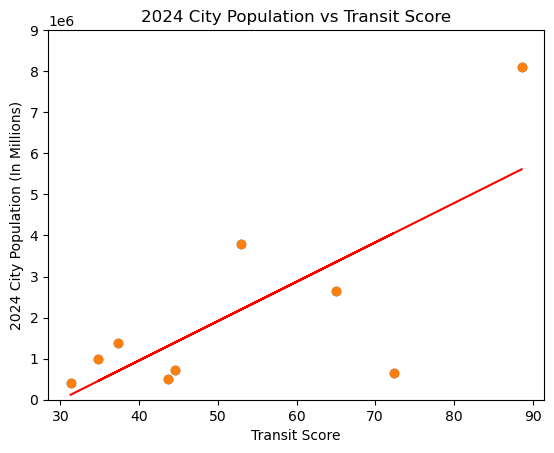

In [129]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(xt, yt)
transitpop_regress_values = xt * slope + intercept
transitpop_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xt,yt)
plt.plot(xt,transitpop_regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Transit Score")
plt.ylabel("2024 City Population (In Millions)")
plt.title("2024 City Population vs Transit Score")
plt.ylim(0,9000000)
plt.scatter(xt, yt)

In [130]:
#Create a scatter plot with a regression line for bike score v population
xb = cleaned_popurban_df['Bike Score']  
yb = cleaned_popurban_df['Population 2024'] 

In [131]:
bike = cleaned_popurban_df.iloc[:,4]
bikepop_correlation = st.pearsonr(bike,pop)
print(f" The correlation between population and walk score is {round(popbike_correlation[0],2)}")

 The correlation between population and walk score is 0.36


In [132]:
(slope,intercept, r_value, p_value, std_err) = linregress(xb,yb)
print(f"Slope(m): {round(slope,2)}")
print(f"Intercept(b): {round(intercept,2)}")
print(f"correlation(r): {round(r_value,2)}")

Slope(m): 75287.44
Intercept(b): -2345621.54
correlation(r): 0.36


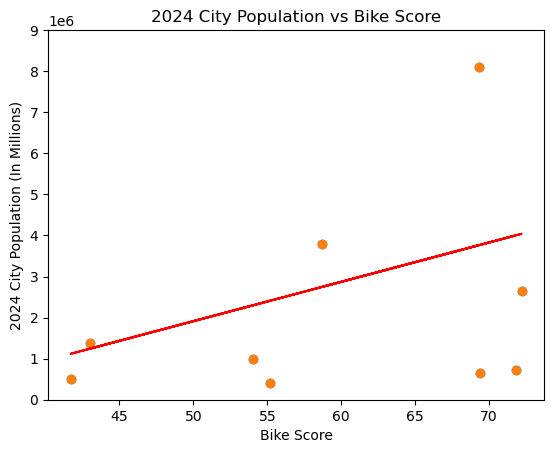

In [134]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(xt, yt)
bikepop_regress_values = xb * slope + intercept
bikepop_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xb,yb)
plt.plot(xb,bikepop_regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Bike Score")
plt.ylabel("2024 City Population (In Millions)")
plt.title("2024 City Population vs Bike Score")
plt.ylim(0,9000000)
plt.scatter(xb, yb)

In [135]:
#Create a scatter plot with a regression line for total urban rank v population
xu = cleaned_popurban_df['Total Urban Score Rank']  
yu = cleaned_popurban_df['Population 2024'] 

In [136]:
urbrank = cleaned_popurban_df.iloc[:,5]
urbrankpop_correlation = st.pearsonr(urbrank,pop)
print(f" The correlation between population and walk score is {round(popurbrank_correlation[0],2)}")

 The correlation between population and walk score is 0.61


In [137]:
(slope,intercept, r_value, p_value, std_err) = linregress(xu,yu)
print(f"Slope(m): {round(slope,2)}")
print(f"Intercept(b): {round(intercept,2)}")
print(f"correlation(r): {round(r_value,2)}")

Slope(m): 565203.96
Intercept(b): -1258915.86
correlation(r): 0.61


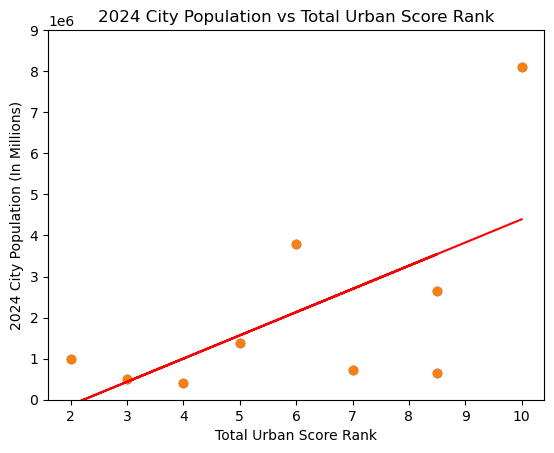

In [141]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(xu, yu)
urbrankpop_regress_values = xu * slope + intercept
bikepop_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xu,yu)
plt.plot(xu,urbrankpop_regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Total Urban Score Rank")
plt.ylabel("2024 City Population (In Millions)")
plt.title("2024 City Population vs Total Urban Score Rank")
plt.ylim(0,9000000)
plt.scatter(xu, yu)

In [ ]:
#create final rankings dataframe

In [145]:
rank_total_cost_df.head(10)

,City,Total_Cost,Rank
0,Austin,70092.91,1.0
1,Nashville,74589.04,2.0
2,Tampa,75533.99,3.0
3,Atlanta,75559.66,4.0
4,Chicago,89801.78,5.0
5,Denver,94948.03,6.0
6,Los Angeles,97766.39,7.0
7,Boston,105947.07,8.0
8,San Diego,106769.00,9.0
9,New York,122290.97,10.0


In [150]:
#Re-Rank the ranking column in descending order
rank_total_cost_df["Rank"] = rank_total_cost_df["Total_Cost"].rank(ascending=False, method='min')
rank_total_cost_df

,City,Total_Cost,Rank
0,Austin,70092.91,10.0
1,Nashville,74589.04,9.0
2,Tampa,75533.99,8.0
3,Atlanta,75559.66,7.0
4,Chicago,89801.78,6.0
5,Denver,94948.03,5.0
6,Los Angeles,97766.39,4.0
7,Boston,105947.07,3.0
8,San Diego,106769.00,2.0
9,New York,122290.97,1.0


In [154]:
# Re name city column for merging
rank_total_cost_df.rename(columns={'City': 'US City'}, inplace=True)
rank_total_cost_df

,US City,Total_Cost,Rank
0,Austin,70092.91,10.0
1,Nashville,74589.04,9.0
2,Tampa,75533.99,8.0
3,Atlanta,75559.66,7.0
4,Chicago,89801.78,6.0
5,Denver,94948.03,5.0
6,Los Angeles,97766.39,4.0
7,Boston,105947.07,3.0
8,San Diego,106769.00,2.0
9,New York,122290.97,1.0


In [155]:
cities_crime_rates_clean

,states,Population 2024,total_crime,total crime score
cities,,,,
New York,New York,8097282,1987.49,9.0
Los Angeles,California,3795936,3332.52,5.0
Chicago,Illinois,2638159,4381.65,2.0
San Diego,California,1388996,2220.67,7.0
Austin,Texas,984567,3612.23,4.0
Denver,Colorado,716234,4360.93,3.0
Boston,Massachusetts,646622,2758.22,6.0
Atlanta,Georgia,514465,5727.52,1.0
Tampa,Florida,408510,2218.24,8.0


In [160]:
#re-set index for merging
cities_crime_rates_clean_reset_df = cities_crime_rates_clean.reset_index()
cities_crime_rates_clean_reset_df

,cities,states,Population 2024,total_crime,total crime score
0,New York,New York,8097282,1987.49,9.0
1,Los Angeles,California,3795936,3332.52,5.0
2,Chicago,Illinois,2638159,4381.65,2.0
3,San Diego,California,1388996,2220.67,7.0
4,Austin,Texas,984567,3612.23,4.0
5,Denver,Colorado,716234,4360.93,3.0
6,Boston,Massachusetts,646622,2758.22,6.0
7,Atlanta,Georgia,514465,5727.52,1.0
8,Tampa,Florida,408510,2218.24,8.0


In [161]:
#rename columns for merging 
cities_crime_rates_clean_reset_df.rename(columns={
    'cities': 'US City',
    'total crime score': 'Crime Score Rank'
}, inplace=True)
cities_crime_rates_clean_reset_df

,US City,states,Population 2024,total_crime,Crime Score Rank
0,New York,New York,8097282,1987.49,9.0
1,Los Angeles,California,3795936,3332.52,5.0
2,Chicago,Illinois,2638159,4381.65,2.0
3,San Diego,California,1388996,2220.67,7.0
4,Austin,Texas,984567,3612.23,4.0
5,Denver,Colorado,716234,4360.93,3.0
6,Boston,Massachusetts,646622,2758.22,6.0
7,Atlanta,Georgia,514465,5727.52,1.0
8,Tampa,Florida,408510,2218.24,8.0


In [162]:
#Merge the cost of living and crime ranking data frames
first_merge_df = pd.merge(cities_crime_rates_clean_reset_df, rank_total_cost_df, on='US City', how='outer')
first_merge_df

,US City,states,Population 2024,total_crime,Crime Score Rank,Total_Cost,Rank
0,Atlanta,Georgia,514465.0,5727.52,1.0,75559.66,7.0
1,Austin,Texas,984567.0,3612.23,4.0,70092.91,10.0
2,Boston,Massachusetts,646622.0,2758.22,6.0,105947.07,3.0
3,Chicago,Illinois,2638159.0,4381.65,2.0,89801.78,6.0
4,Denver,Colorado,716234.0,4360.93,3.0,94948.03,5.0
5,Los Angeles,California,3795936.0,3332.52,5.0,97766.39,4.0
6,Nashville,NaN,NaN,NaN,NaN,74589.04,9.0
7,New York,New York,8097282.0,1987.49,9.0,122290.97,1.0
8,San Diego,California,1388996.0,2220.67,7.0,106769.00,2.0
9,Tampa,Florida,408510.0,2218.24,8.0,75533.99,8.0


In [164]:
#rename column in data frame to specify cost of living rank
first_merge_df.rename(columns={'Rank': 'Cost of Living Rank'}, inplace=True)
first_merge_df

,US City,states,Population 2024,total_crime,Crime Score Rank,Total_Cost,Cost of Living Rank
0,Atlanta,Georgia,514465.0,5727.52,1.0,75559.66,7.0
1,Austin,Texas,984567.0,3612.23,4.0,70092.91,10.0
2,Boston,Massachusetts,646622.0,2758.22,6.0,105947.07,3.0
3,Chicago,Illinois,2638159.0,4381.65,2.0,89801.78,6.0
4,Denver,Colorado,716234.0,4360.93,3.0,94948.03,5.0
5,Los Angeles,California,3795936.0,3332.52,5.0,97766.39,4.0
6,Nashville,NaN,NaN,NaN,NaN,74589.04,9.0
7,New York,New York,8097282.0,1987.49,9.0,122290.97,1.0
8,San Diego,California,1388996.0,2220.67,7.0,106769.00,2.0
9,Tampa,Florida,408510.0,2218.24,8.0,75533.99,8.0


In [165]:
#Merge the new data frame with the urban connectivity ranking dataframe
second_merge_df = pd.merge(first_merge_df, cleaned_popurban_df, on='US City', how='outer')
second_merge_df

,US City,states,Population 2024_x,total_crime,Crime Score Rank,Total_Cost,Cost of Living Rank,US State,Population 2024_y,Walk Score,Transit Score,Bike Score,Total Urban Score Rank
0,Atlanta,Georgia,514465.0,5727.52,1.0,75559.66,7.0,Georgia,514465.0,47.7,43.7,41.7,3.0
1,Austin,Texas,984567.0,3612.23,4.0,70092.91,10.0,Texas,984567.0,41.7,34.8,54.0,2.0
2,Boston,Massachusetts,646622.0,2758.22,6.0,105947.07,3.0,Massachusetts,646622.0,82.8,72.4,69.4,8.5
3,Chicago,Illinois,2638159.0,4381.65,2.0,89801.78,6.0,Illinois,2638159.0,77.2,65.0,72.2,8.5
4,Denver,Colorado,716234.0,4360.93,3.0,94948.03,5.0,Colorado,716234.0,61.2,44.6,71.8,7.0
5,Los Angeles,California,3795936.0,3332.52,5.0,97766.39,4.0,California,3795936.0,68.6,52.9,58.7,6.0
6,Nashville,NaN,NaN,NaN,NaN,74589.04,9.0,NaN,NaN,NaN,NaN,NaN,NaN
7,New York,New York,8097282.0,1987.49,9.0,122290.97,1.0,New York,8097282.0,88.0,88.6,69.3,10.0
8,San Diego,California,1388996.0,2220.67,7.0,106769.00,2.0,California,1388996.0,53.3,37.3,43.0,5.0
9,Tampa,Florida,408510.0,2218.24,8.0,75533.99,8.0,Florida,408510.0,49.5,31.3,55.2,4.0


In [166]:
condensed_merged_df = second_merge_df[["US City","Crime Score Rank","Cost of Living Rank","Total Urban Score Rank"]]
condensed_merged_df

,US City,Crime Score Rank,Cost of Living Rank,Total Urban Score Rank
0,Atlanta,1.0,7.0,3.0
1,Austin,4.0,10.0,2.0
2,Boston,6.0,3.0,8.5
3,Chicago,2.0,6.0,8.5
4,Denver,3.0,5.0,7.0
5,Los Angeles,5.0,4.0,6.0
6,Nashville,NaN,9.0,NaN
7,New York,9.0,1.0,10.0
8,San Diego,7.0,2.0,5.0
9,Tampa,8.0,8.0,4.0


In [167]:
condensed_merged_df.set_index('US City', inplace=True)
condensed_merged_df

,Crime Score Rank,Cost of Living Rank,Total Urban Score Rank
US City,,,
Atlanta,1.0,7.0,3.0
Austin,4.0,10.0,2.0
Boston,6.0,3.0,8.5
Chicago,2.0,6.0,8.5
Denver,3.0,5.0,7.0
Los Angeles,5.0,4.0,6.0
Nashville,NaN,9.0,NaN
New York,9.0,1.0,10.0
San Diego,7.0,2.0,5.0


In [168]:
#Add a column that sums up the ranks and gives each city a final score
condensed_merged_df['Total City Score'] = condensed_merged_df.sum(axis=1)
condensed_merged_df

,Crime Score Rank,Cost of Living Rank,Total Urban Score Rank,Total City Score
US City,,,,
Atlanta,1.0,7.0,3.0,11.0
Austin,4.0,10.0,2.0,16.0
Boston,6.0,3.0,8.5,17.5
Chicago,2.0,6.0,8.5,16.5
Denver,3.0,5.0,7.0,15.0
Los Angeles,5.0,4.0,6.0,15.0
Nashville,NaN,9.0,NaN,9.0
New York,9.0,1.0,10.0,20.0
San Diego,7.0,2.0,5.0,14.0


In [169]:
condensed_merged_df['Final City Rank'] = condensed_merged_df['Total City Score'].rank(ascending=True, method='min')
condensed_merged_df

,Crime Score Rank,Cost of Living Rank,Total Urban Score Rank,Total City Score,Final City Rank
US City,,,,,
Atlanta,1.0,7.0,3.0,11.0,2.0
Austin,4.0,10.0,2.0,16.0,6.0
Boston,6.0,3.0,8.5,17.5,8.0
Chicago,2.0,6.0,8.5,16.5,7.0
Denver,3.0,5.0,7.0,15.0,4.0
Los Angeles,5.0,4.0,6.0,15.0,4.0
Nashville,NaN,9.0,NaN,9.0,1.0
New York,9.0,1.0,10.0,20.0,9.0
San Diego,7.0,2.0,5.0,14.0,3.0


In [170]:
#Sort the data frame by final city ranks
final_city_rank_sorted = condensed_merged_df.sort_values(by='Final City Rank', ascending=False)
final_city_rank_sorted

,Crime Score Rank,Cost of Living Rank,Total Urban Score Rank,Total City Score,Final City Rank
US City,,,,,
New York,9.0,1.0,10.0,20.0,9.0
Tampa,8.0,8.0,4.0,20.0,9.0
Boston,6.0,3.0,8.5,17.5,8.0
Chicago,2.0,6.0,8.5,16.5,7.0
Austin,4.0,10.0,2.0,16.0,6.0
Denver,3.0,5.0,7.0,15.0,4.0
Los Angeles,5.0,4.0,6.0,15.0,4.0
San Diego,7.0,2.0,5.0,14.0,3.0
Atlanta,1.0,7.0,3.0,11.0,2.0
